# 0 Imports

In [1]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from prophet    import Prophet

from IPython.display        import Image
from IPython.core.display   import HTML

In [2]:
# Supressão da notação científica.
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.6f}'.format)

## 0.1 Funções Suporte

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18,8]
    plt.rcParams['font.size'] = 14
    
    display( HTML('<style>.container { width: 100% !important;} </style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
def abrir_arquivo()-> pd.DataFrame:
    with open(f"{__CAMINHO_INTERIM}{__NOME_ARQUIVO_IMPORTAR}","rb") as arquivo:
        df = pickle.load(arquivo)
    return df

In [5]:
def visualizacao_dados_categoricos(df):
    for i in df:
        print(f'Atributo: {i}') 
        print(f'Valores Únicos: {len(df[i].sort_values().unique())}')
        print(f'Valores Descritos: {df[i].sort_values().unique().tolist()}\n')

In [6]:
def estatistica_descritiva(df1):
    # Medidas de tendência central - Mean, Median
    media = pd.DataFrame(df1.apply(np.mean)).T
    mediana = pd.DataFrame(df1.apply(np.median)).T
    
    # Medidas de Dispersão - Std, min, max, range, skew, kurtosis
    desvio_padrao = pd.DataFrame(df1.apply(np.std)).T
    minimo = pd.DataFrame(df1.apply(np.min)).T
    maximo = pd.DataFrame(df1.apply(np.max)).T
    range = pd.DataFrame(df1.apply(lambda x : x.max() - x.min())).T
    assimetria = pd.DataFrame(df1.apply(lambda x : x.skew())).T
    curtosis = pd.DataFrame(df1.apply(lambda x : x.kurtosis())).T
    
    estatistica = pd.concat([minimo, maximo, range, media, mediana, desvio_padrao, assimetria, curtosis]).T.reset_index()
    estatistica.columns = ['variaveis','minimo', 'maximo', 'range', 'media', 'mediana', 'desvio_padrao', 'assimetria', 'curtosis']
    
    return estatistica

## 0.2 Load Data

In [7]:
__CAMINHO_RAW = '../data/raw/'
__CAMINHO_INTERIM = '../data/interim/'

__NOME_ARQUIVO_IMPORTAR = '3_0_feature_engineering.pkl'
#__NOME_ARQUIVO_EXPORTAR =

In [8]:
df = abrir_arquivo()

## 0.3 Observações Gerais da Base de Dados

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57733 entries, 0 to 57732
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   subscription_guid         57733 non-null  object        
 1   date                      57733 non-null  datetime64[ns]
 2   resource_guid             57733 non-null  object        
 3   service_name              57733 non-null  object        
 4   service_type              57733 non-null  object        
 5   service_region            57733 non-null  object        
 6   service_resource          57733 non-null  object        
 7   quantity                  57733 non-null  float64       
 8   cost                      57733 non-null  float64       
 9   maquina                   57733 non-null  object        
 10  ano                       57733 non-null  int32         
 11  mes                       57733 non-null  int32         
 12  dia               

In [10]:
df.tail(5)

,subscription_guid,date,resource_guid,service_name,service_type,service_region,service_resource,quantity,cost,maquina,ano,mes,dia,semana_ano,ano_semana,ano_mes,dia_da_semana,fim_de_semana,custo_fixo_diario,custo_fixo_semanal,custo_fixo_mensal,custo_soma_movel_semanal,custo_soma_movel_mensal
57728,15dc64f3_696a_48fc_9169_8467e3f7bba0,2024-10-31,e53063d5_dd23_4bdf_a1df_cdfe862d01ab,Storage,Standard SSD Managed Disks,BR South,E3 LRS Disk,0.034944,0.078286,unicin,2024,10,31,44,2024-44,2024-10,3,0,2.758325,18.769080,170.831834,34.837048,165.533815
57729,15dc64f3_696a_48fc_9169_8467e3f7bba0,2024-10-31,2f2a1523_d8af_5cea_9b91_d0285e17e343,Backup,All,BR South,Azure VM Protected Instances,0.008064,0.080640,unicin,2024,10,31,44,2024-44,2024-10,3,0,2.758325,18.769080,170.831834,34.837048,165.533815
57730,15dc64f3_696a_48fc_9169_8467e3f7bba0,2024-10-31,2dba9884_2518_4427_90ff_d2c100c5f775,Storage,Standard SSD Managed Disks,BR South,E6 LRS Disk,0.017472,0.156546,unicin,2024,10,31,44,2024-44,2024-10,3,0,2.758325,18.769080,170.831834,34.837048,165.533815
57731,15dc64f3_696a_48fc_9169_8467e3f7bba0,2024-10-31,8dbc6497_3d3a_47d6_9de4_dd42072fad66,Storage,Standard Page Blob,BR South,LRS Data Stored,0.000676,0.000078,unicin,2024,10,31,44,2024-44,2024-10,3,0,2.758325,18.769080,170.831834,34.837048,165.533815
57732,15dc64f3_696a_48fc_9169_8467e3f7bba0,2024-10-31,40551b4c_e8be_48ed_b70b_f8d25c7de724,Storage,General Block Blob,All,Read Operations,0.000800,0.000000,unicin,2024,10,31,44,2024-44,2024-10,3,0,2.758325,18.769080,170.831834,34.837048,165.533815


# 4.0 EDA pós F.E.

## 4.1 Entendimento de Negócio

### Informações/Premissas do negócio

'maquina' UNICIN - renovação de contrato: 12 Mar 2025 - Mais estável na sua utilização sem ocilação de teste. Dados mais reais e confiáveis. Ação: Pode ser trabalhado.

'maquina' CEAEC - renovação de contrato: 07 Jan 2025 - Estável na sua utilização atual, com algumas ocilações de testes e inputs propositais. Possui variação, mas ainda confiáveis. Ação: Pode ser trabalhado, mas tome cuidado com variações extremas e recorra ao negócio quando for necessário.

'maquina' PORTAL (Editares) - renovação de contrato: 08 Sep 2025 - Ainda em fase de testes e montagem dos serviços. Possui alto grau de variação e os dados não representam a característica mais próximo do normal de comportamento devido a fase de multiplos testes e  montagem dos serviços. Ação: Após fase de teste (Novembro/2024), possivemente em 01/01/2025 já posso começar a trabalhar.

Sobre a máquina PORTAL: lembrar que do dia 2024-09-08 ao dia 2024-09-19 o ['service_name'] == 'Functions' deve ficar sob vigia, pois foi um engano na utilização da máquina. Possivelmente todos os dados anteriores a Novembro ou Dezembro de 2024 serão "descartados" para fins de treinamento de modelo.


Normalmente, os créditos são disponibilizados 30 dias antes.

## 4.2 Análise Univariada

In [11]:
df_numerico = df.select_dtypes(include=['int64', 'int32', 'float64'])
df_categorico = df.select_dtypes(exclude=['int64', 'int32', 'float64','datetime64[ns]'])

### 4.2.1 Numéricos

In [12]:
estatistica_descritiva(df_numerico)

,variaveis,minimo,maximo,range,media,mediana,desvio_padrao,assimetria,curtosis
0,quantity,0.000000,832.332400,832.332400,8.022273,0.071424,26.548001,8.571524,120.965305
1,cost,0.000000,14.386982,14.386982,0.350476,0.012164,0.766197,3.395670,21.777083
2,ano,2021.000000,2024.000000,3.000000,2022.738901,2023.000000,0.934523,-0.043518,-1.039700
3,mes,1.000000,12.000000,11.000000,6.872517,7.000000,3.459958,-0.154946,-1.200894
4,dia,1.000000,31.000000,30.000000,15.827257,16.000000,8.770667,-0.008353,-1.183632
5,dia_da_semana,0.000000,6.000000,6.000000,2.993037,3.000000,2.000005,0.005443,-1.249314
6,fim_de_semana,0.000000,1.000000,1.000000,0.284413,0.000000,0.451134,0.955781,-1.086520
7,custo_fixo_diario,0.662484,27.567188,26.904704,8.382521,8.634676,2.439409,1.900951,11.319124
8,custo_fixo_semanal,4.897755,179.141964,174.244209,58.203012,60.438798,16.742619,1.485495,8.647996
9,custo_fixo_mensal,53.427584,410.306254,356.878670,249.929355,264.421509,65.596460,-0.001510,-0.020484


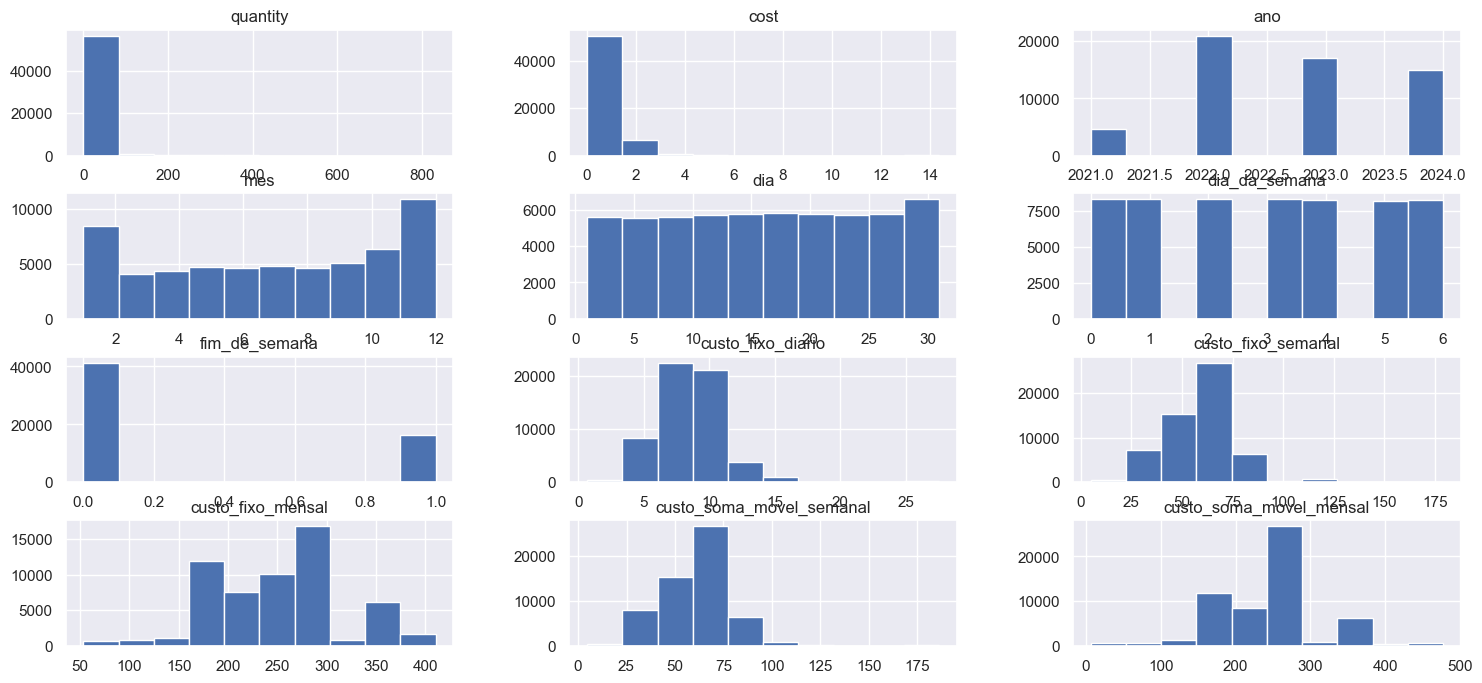

In [13]:
df_numerico.hist();

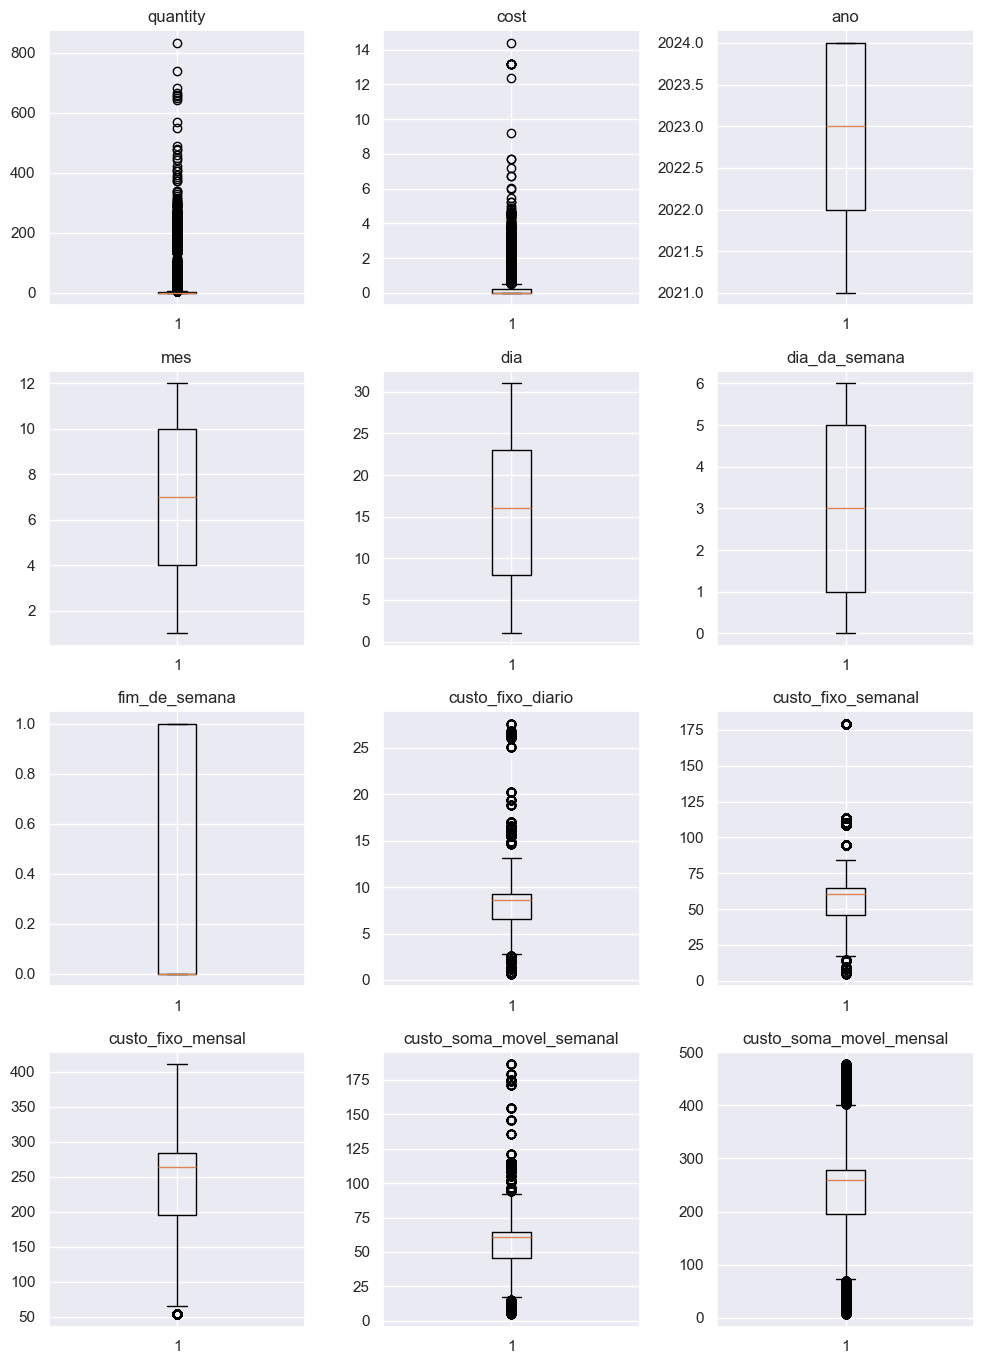

In [22]:
fig, axes = plt.subplots(4,3, figsize=(10, 15))

for ax, var in zip(axes.flatten(), df_numerico.columns):
    ax.boxplot(df_numerico[var])
    ax.set_title(f'{var}')
    #ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

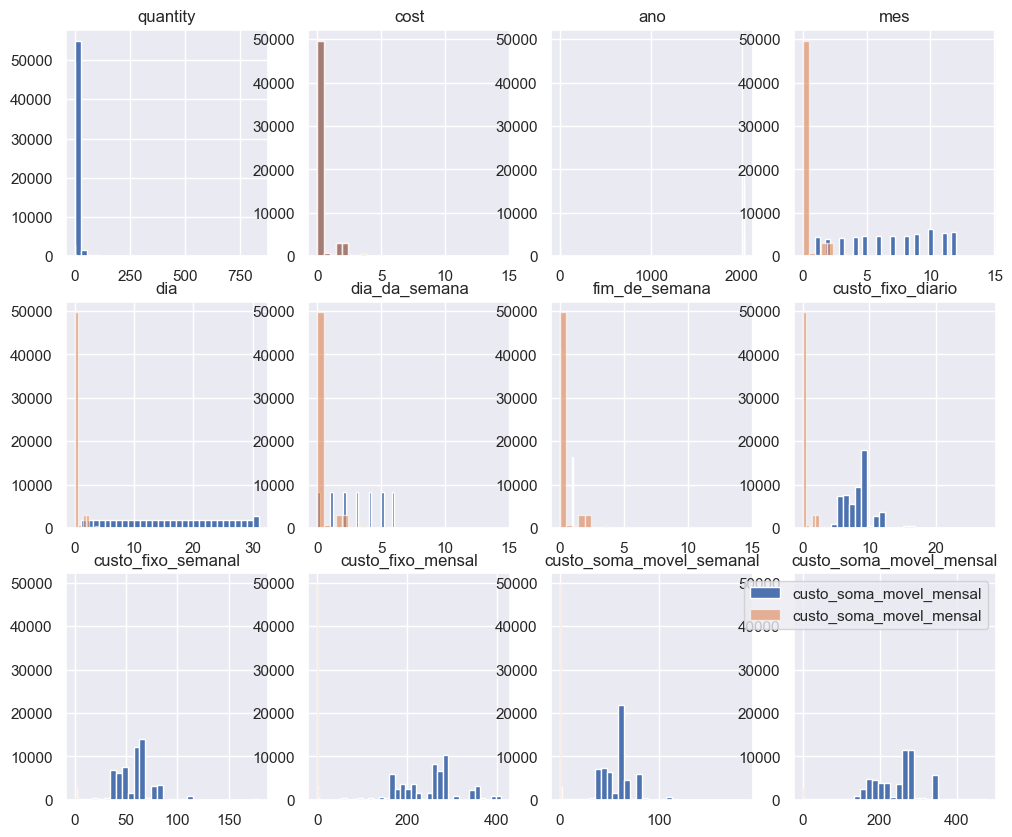

In [39]:
fig, axes  = plt.subplots(3,4, figsize=(12, 10))

for ax, var in zip(axes.flatten(), df_numerico.columns):
    ax.hist(df[var], bins = 30, alpha=1, label = var)
    ax.hist(df['cost'], bins = 30, alpha=0.6, label = var)
    ax.set_title(f'{var}')

plt.legend()
plt.show()

### 4.2.2 Categóricos

In [14]:
visualizacao_dados_categoricos(df_categorico)

Atributo: subscription_guid
Valores Únicos: 3
Valores Descritos: ['0b1856f5_ffb1_4fb2_9b31_ebc3ddeacf68', '15dc64f3_696a_48fc_9169_8467e3f7bba0', '82375e17_0dda_4790_b6e8_c565d4f08e87']

Atributo: resource_guid
Valores Únicos: 86
Valores Descritos: ['05212985_faad_4b6c_8ddb_c08cc8e37f79', '0b248445_aa24_4fe8_a794_a174929327bd', '0b608a26_f611_4232_8192_ce81b6b57194', '0ddb5c81_143d_52f8_9ea3_29b64cc0ef97', '0f68ed30_d33d_4b1b_8533_f16ae059f71d', '0f824807_2376_435c_95c9_f992b67a07b0', '0fcb37f3_8a5a_4e81_820e_848908a57e44', '11ecb7d4_b18a_447a_bb0c_f057585fc701', '12da282f_7e96_49e2_983a_9a65da2a4866', '13c2d6a4_7f53_47a9_b6aa_8bb6167ac54d', '17b3fc96_9141_4e25_88f2_b8953f3ca784', '1adb9ebc_c08f_426d_9aa4_8af9de7b6d74', '1b74a37f_45a2_4266_bf07_2764801d0b85', '211e620c_ebcf_4db5_a7fd_996abebe9546', '26ce34b7_67b3_480d_9d1b_54a7fb80f67a', '27426e86_f015_4506_a8cc_26c18688990a', '28339581_90e9_4bde_93d2_a61b4f2a0b5e', '2dba9884_2518_4427_90ff_d2c100c5f775', '2f2a1523_d8af_5cea_9b91_d0285

## 4.3 Análise Bivariada

## 4.4 Análise Multivariada